In [1]:
import numpy as np

Question 7 (Programming: The Surprising Geometry of High Di-
mensions - 15 pts)
In low dimensions like R2 or R3, our geometric intuition serves us well. We can easily imagine
vectors pointing in any direction. This exercise challenges that intuition by asking you to empirically
investigate what “random direction” means as the number of dimensions grows very large.
(a) Write a Python function get angle between random vectors(p dim) that takes an integer
p dim as input. Inside this function, you should:
i) Generate two random vectors of dimension p dim, where each component is drawn from
a standard normal distribution (np.random.randn(p dim)).
ii) Calculate the angle between these two vectors in degrees.
iii) Return the calculated angle.
(b) Create a function run simulation(p dim, num trials) that calls the function from part
(a) num trials times for a given dimension p dim and returns a list or NumPy array of the
resulting angles.
(c) Run simulations for the following three scenarios:
• Scenario 1: Low dimension, p = 2, with 10,000 trials.
• Scenario 2: Medium dimension, p = 100, with 10,000 trials.
• Scenario 3: High dimension, p = 1000, with 10,000 trials.
(d) Using the code provided, create a single figure with three subplots arranged horizontally.
Each subplot shows a histogram of the angles for one of the scenarios.
1 # Create the plots
2 fig , axes = plt . subplots (1 , 3 , figsize =(18 , 5) , sharey = True )
3 fig . suptitle ( ’ Distribution of Angles Between Random High - Dimensional
Vectors ’ ,
9
4 fontsize =16)
5
6 for i , p in enumerate ( dims ) :
7 axes [ i ]. hist ( results [ p ] , bins =50 , density = True , alpha =0.8 ,
8 color = ’ skyblue ’ , edgecolor = ’ black ’)
9 axes [ i ]. set_title ( f ’ Dimension p = { p } ’ , fontsize =14)
10 axes [ i ]. set_xlabel ( ’ Angle ( degrees ) ’)
11 axes [ i ]. set_xlim (0 , 180)
12 axes [ i ]. axvline (90 , color = ’r ’ , linestyle = ’ -- ’ , linewidth =2 ,
13 label = ’ 90 degrees ( Orthogonal ) ’)
14 axes [ i ]. grid ( True , linestyle = ’: ’)
15 axes [ i ]. legend () # Moved inside the loop
16
17 axes [0]. set_ylabel ( ’ Probability Density ’) # Corrected : set on first
Axes
18 plt . tight_layout ( rect =[0 , 0.03 , 1 , 0.95])
19 plt . savefig ( ’ angle_distribution . png ’ , bbox_inches = ’ tight ’)
20 print ( " Plot saved as ’ angle_distribution . png ’" )
21 plt . show (

In [2]:


def get_angle_between_random_vectors(p_dim: int) -> float:
    v1 = np.random.randn(p_dim)
    v2 = np.random.randn(p_dim)

    # angle = inv cos of dot product / (magnitude v1 * magnitude v2)
    inner_product = np.dot(v1, v2)
    magnitude_v1 = np.linalg.vector_norm(v1)
    magnitude_v2 = np.linalg.vector_norm(v2)

    angle = np.arccos(inner_product / (magnitude_v1 * magnitude_v2))
    return angle

def run_simulation(p_dim: int, num_trials: int) -> np.array:
    angles = np.zeros(num_trials)
    for idx in range(num_trials):
        angles[idx] = get_angle_between_random_vectors(p_dim)
    
    return angles


# Scenario 1: Low dimension, p = 2, with 10,000 trials.
low_dimension_angles = run_simulation(2, 10000)
# Scenario 2: Medium dimension, p = 100, with 10,000 trials.
medium_dimension_angles = run_simulation(100, 10000)
# Scenario 3: High dimension, p = 1000, with 10,000 trials.
high_dimension_angles = run_simulation(1000, 10000)

In [3]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


 Plot saved as ’ angle_distribution . png ’


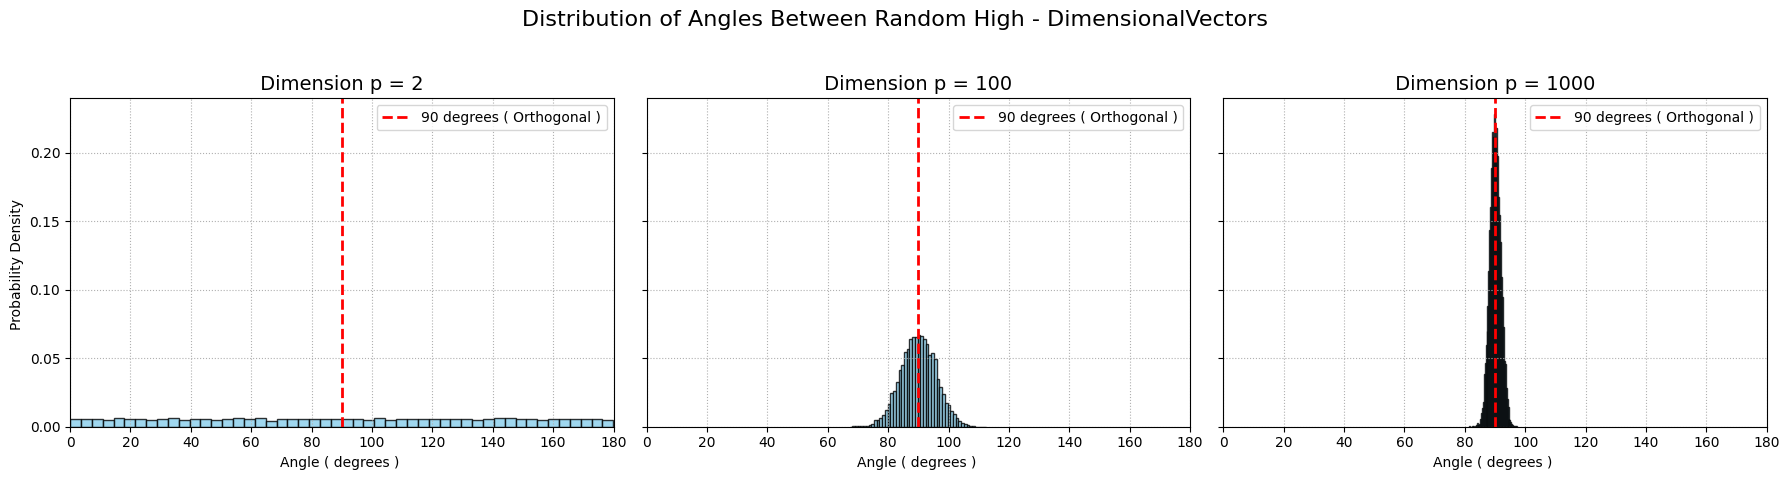

In [9]:
import matplotlib.pyplot as plt

fig , axes = plt.subplots(1 , 3 , figsize =(18 , 5) , sharey = True )
fig.suptitle('Distribution of Angles Between Random High - DimensionalVectors' ,fontsize =16)
dims = np.array([2, 100, 1000])
results = {2: np.degrees(low_dimension_angles), 100: np.degrees(medium_dimension_angles), 1000: np.degrees(high_dimension_angles)}
for i , p in enumerate ( dims ) :
    axes[ i ].hist( results [ p ] , bins =50 , density = True , alpha =0.8 , color = 'skyblue' , edgecolor = 'black')
    axes[ i ].set_title( f' Dimension p = { p } ' , fontsize =14)
    axes[ i ].set_xlabel( 'Angle ( degrees ) ')
    axes[ i ].set_xlim(0 , 180)
    axes[ i ].axvline(90 , color = 'r' , linestyle = '--' , linewidth =2 ,
    label = '90 degrees ( Orthogonal )')
    axes[ i ].grid( True , linestyle = ':')
    axes[ i ].legend() # Moved inside the loop

axes[0].set_ylabel( 'Probability Density ') # Corrected : set on first Axes
plt.tight_layout( rect =[0 , 0.03 , 1 , 0.95])
plt.savefig( 'angle_distribution.png' , bbox_inches = 'tight')
print(" Plot saved as ’ angle_distribution . png ’" )
plt.show()
